# Exercise 1
By: Jorge Aranda (800839) and Alberto Zafra (876628)

***EXERCISE 1: STATIC CONSENSUS***



In [ ]:
# This is a comment in python. The following import statement is just for python2 python3 compatibility reasons
from __future__ import absolute_import, division, print_function, unicode_literals

## **Remember to download if you want to save your tests (File-Download .py or .ipynb)**

# Building a static graph

For arrays, we will use numpy arrays.

In [ ]:
import numpy as np  # Make numpy available using np.
from matplotlib import pyplot as plt # Plotting of the graph

class mrs_graph:
  
  def __init__(self,n_agents=4,link_list=np.array([[0, 1], [0, 2], [1,2], [2, 3]]),undirected=True,alpha=0.004):
    """__init__ --> Constructor of the mrs_graph class

      Args:
          n_agents (int, optional): Determines the number of agents present within the graph. Defaults to 4.
          link_list (numpy.ndarray, optional): Determines the list of links within the graph. Defaults to np.array([[0, 1], [0, 2], [1,2], [2, 3]]).
          undirected (bool, optional): Determines if the graph is undirected or directed. Defaults to True.

      Raises:
          ValueError: If the link_list contains an agent that it is not within the graph an error would be raised
    """

    self.n=n_agents # number of agents. Indices are 0, 1, ..., n-1
    self.alpha = alpha

    # Matrices
    self.graph_A=np.zeros((self.n,self.n))  # This is the Adjacency matrix (size nxn)
    self.graph_E=np.zeros((self.n,len(link_list)))  # This is the Incidence matrix (size nxlinks)
    self.graph_D=np.zeros((self.n,self.n))  # This is the Diagonal matrix (size nxn)
    self.graph_L=np.zeros((self.n,self.n))  # This is the Laplacian matrix (size nxn)
    self.graph_W=np.zeros((self.n,self.n))  # This is the Weight matrix (size nxn)
    
    
    #links 
    if(np.max(link_list) <= n_agents):
      self.list_links = link_list # include more links as desired
    else:
      self.list_links = np.array([])
      incorrect_links = np.where(link_list > self.n)[0]
      raise ValueError("Revisit the links that you have created, it might be that the links {} incorrect".format(incorrect_links))
         
    # Determines if the graph is directed or not
    self.is_undirected=undirected
    
    # We compute all the initial matrices
    self.compute_AllMatrices(debug_print=True)
    
    
   
  # ++++++++++++++++++++++++++ Undirection Methods ++++++++++++++++++++++++++
   
  def set_undirected(self,undirected):
    """set_undirected --> Overwrites the undirection constraint

    Args:
        undirected (bool): The new value of the direction constraint
    """
    self.is_undirected=undirected 
    
  def get_undirected(self):
    """get_undirected --> Returns the undirection value

    Returns:
        bool: The undirection value
    """
    return self.is_undirected
    
    
    
  # ++++++++++++++++++++++++++ Agent Methods ++++++++++++++++++++++++++
  def set_n_agents(self,n_agents, link_list):
    
    """set_n_agents --> Overwrites the number of agents of the graph and updates graph accordingly
    
      Args:
        n_agents (int): The new number of agents (nodes) present within the graph
    """
    
    
    self.n = n_agents
    # TODO: Update the link list
    self.graph_A=np.zeros((self.n,self.n)) # We reset the adjacency matrix based on the new number of agents
    # TODO: Put a function that recomputes all the matrices
    self.update_A() # We update the adjacency matrix
    
    
  def get_n_agents(self):
    
    """get_n_agents --> Returns the number of agents present within the graph

    Returns:
        int: Number of agents within the graph
    """
    
    return self.n
    
    
    
    
  # ++++++++++++++++++++++++++ Link List Methods ++++++++++++++++++++++++++
  
  def set_link_list(self, link_list):
    """set_link_list --> Generated only for naming purposes. Overwrites the link list of the graph

    Args:
        link_list (numpy.ndarray): new list of links that will overwrite the current list
    """
    self.set_links(link_list)
    
    
  def set_links(self,link_list):
    """set_links --> Overwrites the link list of the graph

      Args:
          link_list (numpy.ndarray): new list of links that will overwrite the current list

      Raises:
          ValueError: If the link_list contains an agent that it is not within the graph an error would be raised
    """
    if(np.max(link_list) <= self.n):
      self.list_links = link_list # include more links as desired
      # TODO: execute all the methods of the matrices
      self.update_A() # Update the adjacency matrix
    else:
      incorrect_links = np.where(link_list > self.n)[0] ### --> Maybe an error
      raise ValueError("Could not overwrite the link list, it might be that the inputed links {} are incorrect".format(incorrect_links))
  
  def get_link_list(self):
    """get_link_list --> returns the list of links within the graph

    Returns:
        numpy.ndarray: list of links
    """
    return self.list_links
  
  def get_n_links(self):
    """get_n_links --> returns the number of links present within the graph

    Returns:
        int: number of links within the graph
    """
    return self.list_links.shape[0]
  
  def add_links(self, links_to_add, debug_print=False):
    """add_links --> add links to the graph, it avoids repeated links and incorrect links

    Args:
        links_to_add (numpy.ndarray): List of links that have to be added
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.
    """
    
    # We get the links that are not within the previously generated list of links
    link_differences = self.compare_lists(self.list_links, links_to_add)
    
    elements_to_add = links_to_add[link_differences == False] # We get the elements that are not within the list_links
    
    added_elements = np.array([])
    for element in elements_to_add:
      if np.max(element) < self.n:
        np.vstack((self.list_links, element))
        np.vstack((added_elements, element))
      else:
        continue
    
    print("Successfully added the elements {} within the link list".format(added_elements))
    
    # Print the non-added elements
    if(debug_print):
      excluded_elements = self.compare_lists(added_elements, elements_to_add)
      excluded_elements = elements_to_add[excluded_elements == False]
      print("Elements {} have been excluded".format(excluded_elements))
      
      repeated_elements = links_to_add[link_differences]
      print("Elements {} were avoided due to repetition".format(repeated_elements))
      
  # TODO: Method for update link
      
    
  def delete_links(self, links_to_remove, debug_print=False):
    """delete_links --> Generated only for naming simplicity, it removes desired links from the link list

    Args:
        links_to_remove (numpy.ndarray/list): List of links to remove
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.

    """
    self.remove_links(links_to_remove,debug_print)
  
  
  
  def remove_links(self, links_to_remove, debug_print=False):
    
    """remove_links --> It removes desired links from the link list

    Args:
        links_to_remove (numpy.ndarray/list): List of links to remove
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.

    """

    if(type(links_to_remove) == 'list'):
      
      # If we have a list with the indices --> like links_to_remove = [0, 2, 4]
      mask = np.ones(len(self.list_links), dtype=bool)
      
      links_to_remove = np.array([links_to_remove]).squeeze()
      
      
      mask[links_to_remove[np.where(links_to_remove < len(self.list_links))[0]]] = False
      
      if(debug_print):
        print("Successfully deleted links {} with indices {}".format(self.list_links[links_to_remove], links_to_remove))
        
      self.list_links = self.list_links[mask]
      
    else:
      
      # If we have a list of links --> like links_to_remove = [[0,1], [1,2]]
      mask = self.compare_lists(links_to_remove, self.list_links)
      
      if(debug_print):
        print("Successfully deleted links {}".format(self.list_links[mask]))
        
      self.list_links = self.list_links[~mask]
      
    
    print("Updated link list = {}".format(self.list_links))
    
    # TODO: Update all the matrices
    self.update_A()      
      
    
      

  def compare_lists(array1, array2):
    """compare_lists --> It compares 2 arrays

    Args:
        array1 (numpy.ndarray): Array used as a reference
        array2 (numpy.ndarray): Array used for the comparison

    Returns:
        numpy.ndarray: It returns a boolean numpy.ndarray of shape(array2) with a True value in the positions of the elements of the array2 that are contained within array1, False otherwise
    """
    return np.any(np.all(array2[:, None, :] == array1, axis=2), axis=1)




# ++++++++++++++++++++++++++ Adjacency Matrix Methods ++++++++++++++++++++++++++
  def update_A(self, debug_print=False):
    """update_A --> Generated only for naming simplicity, it updates the adjacency matrix by recomputing it
    """
    self.compute_AdjacencyMatrix(debug_print)
  
  
  def compute_AdjacencyMatrix(self, debug_print=False):
    """compute_AdjacencyMatrix --> computes the Adjacency Matrix based on the list of links
                               --> More info: https://byjus.com/maths/adjacency-matrix/
      
          Args:
              debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    
    for indx in range(self.list_links.shape[0]):
      node_i = self.list_links[indx,0]
      node_j = self.list_links[indx,1]
      if(debug_print):
        print("indx:", indx)
        print("link element: (", node_i, ",", node_j, ")")
      self.graph_A[node_i, node_j]=1
      if self.is_undirected:
          self.graph_A[node_j, node_i]=1

  def get_A(self):
    """get_A --> Generated only for naming simplicity, it returns the adjacency matrix

    Returns:
        numpy.ndarray : Adjacency matrix
    """
    return self.graph_A
  
  def get_Adjacency_Matrix(self):
    """get_Adjacency_Matrix --> It returns the adjacency matrix

    Returns:
        numpy.ndarray : Adjacency matrix
    """
    return self.graph_A



  # ++++++++++++++++++++++++++ Incidence Matrix Methods ++++++++++++++++++++++++++

  def update_E(self,debug_print=False):
    """update_E --> Generated only for naming simplicity, it updates the incidency matrix by recomputing it
    
      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_IncidenceMatrix(debug_print)
    
  def compute_IncidenceMatrix(self,debug_print=False):
    """compute_IncidenceMatrix --> computes the Incidency Matrix based on the list of links
                              --> More info: https://amitrajan012.github.io/post/chapter_10_graphs_networks_and_incidence_matrices/

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    for indx in range(self.list_links.shape[0]):
      node_i = self.list_links[indx,0]  #
      node_j = self.list_links[indx,1]
      if(debug_print):
        print("indx:", indx)
        print("link element: (", node_i, ",", node_j, ")")
      self.graph_E[indx, node_j]=1
      if self.is_undirected:
          self.graph_E[indx, node_i]=1
      else:
        self.graph_E[indx, node_i]=-1


  def get_E(self):
    """get_E --> Generated for naming simplicity, it returns the Incidence Matrix

    Returns:
        numpy.ndarray : Returns the Incidence Matrix
    """
    return self.graph_E

  def get_IncidenceMatrix(self):
    """get_IncidenceMatrix --> Returns the Incidence Matrix

    Returns:
        numpy.ndarray : Returns the Incidence Matrix
    """
    
    return self.graph_E




  # ++++++++++++++++++++++++++ Degree Matrix Methods ++++++++++++++++++++++++++

  def update_D(self,debug_print=False):
    """update_D --> Generated only for naming simplicity, it updates the degree matrix by recomputing it
    
      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_DegreeMatrix(debug_print)
    
  def compute_DegreeMatrix(self,debug_print=False):
    """compute_DiagonalMatrix --> Computes the degree matrix
                              --> More info: https://en.wikipedia.org/wiki/Degree_matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.update_A(debug_print)
    # We compute the degree matrix as the diagonal of A*Transpose(A)
    self.graph_D = np.diag(np.diag(self.graph_A @ self.graph_A.T))
    
    if(debug_print):
      print(self.graph_D)
      

  def get_D(self):
    """get_D --> Generated for naming simplicity, it returns the Degree Matrix

    Returns:
        numpy.ndarray : Returns the Degree Matrix
    """
    return self.graph_D

  def get_DegreeMatrix(self):
    """get_DegreeMatrix --> Returns the Degree Matrix

    Returns:
        numpy.ndarray : Returns the Degree Matrix
    """
    
    return self.graph_D
    
    

  # ++++++++++++++++++++++++++ Laplacian Matrix Methods ++++++++++++++++++++++++++

  def update_L(self,debug_print=False):
    """update_L --> Generated only for naming simplicity, it updates the Laplacian matrix by recomputing it
    
      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_LaplacianMatrix(debug_print)
    
  def compute_LaplacianMatrix(self,debug_print=False):
    """compute_LaplacianMatrix --> Computes the Laplacian matrix
                              --> More info: https://en.wikipedia.org/wiki/Laplacian_matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.update_D(debug_print)  # We update the Degree Matrix in order to have the most recent computation
    # We compute the Laplacian matrix as Degree matrix - Adjacent matrix
    self.graph_L = self.graph_D - self.graph_A
    
    if(debug_print):
      print(self.graph_L)
      

  def get_L(self):
    """get_L --> Generated for naming simplicity, it returns the Laplacian Matrix

    Returns:
        numpy.ndarray : Returns the Laplacian Matrix
    """
    return self.graph_L

  def get_LaplacianMatrix(self):
    """get_LaplacianMatrix --> Returns the Laplacian Matrix

    Returns:
        numpy.ndarray : Returns the Laplacian Matrix
    """
    
    return self.graph_L



  def get_algebraic_conn(self,debug_print=False):
    """get_algebraic_conn --> Computes the algebraic connectivity of the graph based on the Laplacian matrix
                          --> The algebraic connectivity is the second eigen value
                          --> If this eigen value is greater than 0 the graph is connected, otherwise, it is disconnected
                          --> The bigger the eigen values is the more connected the graph is

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.

    Returns:
        numpy.complex128: Returns the second eigenvalue of the Laplacian matrix (also known as the algebraic connectivity)
    """
    eigenvalues = np.sort(self.get_eigenvalues(self.graph_L))
    algebraic_conn = eigenvalues[1]# display the algebraic connectivity
    if(debug_print):
      print("Eigen Values of the Laplacian Matrix: ", eigenvalues)
      print("algebraic connectivity: ", algebraic_conn)
    
    return algebraic_conn

# ++++++++++++++++++++++++++ Weight Matrix Methods ++++++++++++++++++++++++++

  def update_W(self,debug_print=False):
    """update_W --> Generated for naming simplicity, it computes the Weight Matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_WeightMatrix(debug_print)
    
  

  def compute_WeightMatrix(self,debug_print=False):
    """compute_WeightMatrix --> Computes the Weight matrix based on the Perron matrix
                            --> More info: https://math.stackexchange.com/questions/28282/perron-frobenius-theorem-and-graph-laplacians

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    
    self.update_L(debug_print)

    self.graph_W = np.eye(np.shape(self.get_LaplacianMatrix())[0]) - self.alpha * self.get_LaplacianMatrix()# compute the Perron matrix associated to the Laplacian
    
    if debug_print: 
      print("Weight_matrix =", self.graph_W)
      
      
  def get_W(self):
    """get_W --> Generated for naming simplicity, it returns the Weight Matrix

    Returns:
        numpy.ndarray : Returns the Weight Matrix
    """
    return self.graph_W
  
  def get_WeightMatrix(self):
    """get_WeightMatrix --> Returns the Weight Matrix

    Returns:
        numpy.ndarray : Returns the Weight Matrix
    """
    return self.graph_W
  
  


# ++++++++++++++++++++++++++ Update All Matrix Method ++++++++++++++++++++++++++


  def update_AllMatrices(self,debug_print=False):
    """update_AllMatrices --> Computes all the matrices of the graph systematically (Adjacent, Incidence, Degree, Laplacian and Weight matrices)

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_AllMatrices(debug_print)
    
    
  def compute_AllMatrices(self,debug_print=False):
    
    # First we compute the Incidence matrix
    self.update_E(debug_print)
    
    # Secondly, we compute the Weight, Laplacian, Degree and Adjacency matrices
    self.update_W(debug_print)
    
    


# ++++++++++++++++++++++++++ Standard Static Matrix Methods ++++++++++++++++++++++++++

  def get_eigen(matrix, debug_print=False):
    """get_eigen --> Computes the eigenvalues and eigenvectors of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.

    Returns:
        eigenvalues (numpy.ndarray): Eigen Values of the matrix
        eigenvectors (numpy.ndarray): Eigen Vectors of the matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    if(debug_print):
      print("Eigen Values = ", eigenvalues)
      print("Eigen Vectors = ", eigenvectors)
    
    return eigenvalues, eigenvectors


  def get_eigenvalues(matrix):
    """get_eigenvalues --> Computes the eigenvalues of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed

    Returns:
        numpy.ndarray: Eigen Values of the matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues


  def get_eigenvectors(matrix):
    """get_eigenvectors --> Computes the eigenvectors of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed

    Returns:
        numpy.ndarray: Eigen Vectors of the matrix
    """
    
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvectors
  


# ++++++++++++++++++++++++++ Plotting methods ++++++++++++++++++++++++++

  def plot_graph(self):
    """plot_graph --> plots the graph topology, using the Adjacency matrix
                --> All the agents (nodes) are placed within a circle
                --> The previously generated links are represented as lines between the nodes

    """
    
    n=self.graph_A.shape[0]
    #v_angles1=np.linspace(0, 2*np.pi, n+1, endpoint=True)
    v_angles=np.linspace(0, 2*np.pi, n, endpoint=False)
    #print(v_angles1)
    print(v_angles)
    v_x=np.cos(v_angles)
    v_y=np.sin(v_angles)
    v_x_text=np.cos(v_angles)*1.1
    v_y_text=np.sin(v_angles)*1.1
    print(v_x)
    print(v_y)
    plt.title("Graph: links")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    for i in range(n):
      for j in range(n):
        if self.graph_A[i,j]>0:
          x_ini=v_x[i]
          y_ini=v_y[i]
          dx= v_x[j] -x_ini
          dy= v_y[j] -y_ini
          plt.arrow(x_ini, y_ini, dx, dy, head_length=0.1,length_includes_head=True, head_width=0.05)
    plt.plot(v_x,v_y, "or") ,#without lines, only the dots
    for i in range(n):
      plt.text(v_x_text[i], v_y_text[i], str(i))
    plt.show()


# ------------------------------------------------------------------ End of the class ------------------------------------------------------------------------------

Once we have defined the basic values for the graph, we introduce the links in the graph_A matrix (**Adjacency** matrix). Feel free to re-organize the code and implement these functionalities in class methods, to improve the code use in your future implementations. If you have finally a class to manage the graphs, you will be able to use it later in a better way

In [4]:
my_graph1=mrs_graph()
print(my_graph1.get_Adjacency_Matrix())
print("shape 0 (number of links):", my_graph1.list_links.shape[0])
print("Shape 0: ", my_graph1.get_n_links())
print("shape 1 (the two nodes involved):", my_graph1.list_links.shape[1])

print(my_graph1.graph_A)

indx: 0
link element: ( 0 , 1 )
indx: 1
link element: ( 0 , 2 )
indx: 2
link element: ( 1 , 2 )
indx: 3
link element: ( 2 , 3 )
indx: 0
link element: ( 0 , 1 )
indx: 1
link element: ( 0 , 2 )
indx: 2
link element: ( 1 , 2 )
indx: 3
link element: ( 2 , 3 )
indx: 0
link element: ( 0 , 1 )
indx: 1
link element: ( 0 , 2 )
indx: 2
link element: ( 1 , 2 )
indx: 3
link element: ( 2 , 3 )
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 1.]]
indx: 0
link element: ( 0 , 1 )
indx: 1
link element: ( 0 , 2 )
indx: 2
link element: ( 1 , 2 )
indx: 3
link element: ( 2 , 3 )
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 1.]]
[[ 2. -1. -1.  0.]
 [-1.  2. -1.  0.]
 [-1. -1.  3. -1.]
 [ 0.  0. -1.  1.]]
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
shape 0 (number of links): 4
Shape 0:  4
shape 1 (the two nodes involved): 2
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]


We plot the topology. Nodes are placed in a circule. Lines represent links between them. We use **matplotlib**.

[0.         1.57079633 3.14159265 4.71238898]
[ 1.0000000e+00  6.1232340e-17 -1.0000000e+00 -1.8369702e-16]
[ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00]


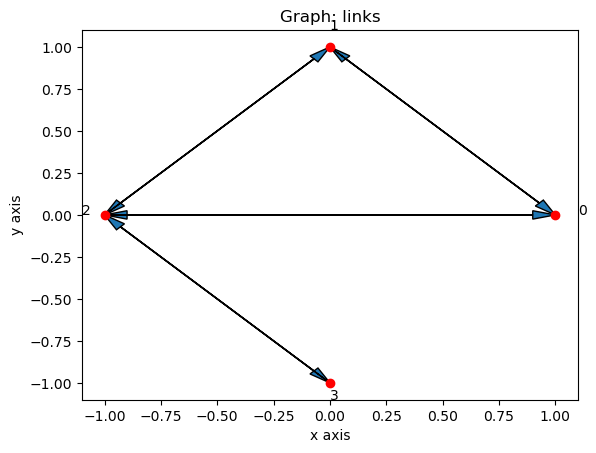

In [5]:
my_graph1.plot_graph()

# Laplacian based static consensus

Build the **Laplacian** matrix. Obtain the **algebraic connectivity**. Build the **weight** matrix (Laplacian based **Perron** matrix). Choose an **alpha** small enough for the Laplacian matrix, so that the weight matrix is convergent.

In [6]:
print(my_graph1.graph_A)
print("sum over axis=0", my_graph1.graph_A.sum(axis=0), ": sum of every column")
print("sum over axis=1", my_graph1.graph_A.sum(axis=1), ": sum of every row")

# Computation of the Degree matrix
my_graph1.compute_DegreeMatrix()
print("Degree_matrix: ")
print(my_graph1.get_D())

# Computation of the Laplacian matrix
my_graph1.compute_LaplacianMatrix()
print("Laplacian_matrix: ")
print(my_graph1.get_L())


[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
sum over axis=0 [2. 2. 3. 1.] : sum of every column
sum over axis=1 [2. 2. 3. 1.] : sum of every row
Degree_matrix: 
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 1.]]
Laplacian_matrix: 
[[ 2. -1. -1.  0.]
 [-1.  2. -1.  0.]
 [-1. -1.  3. -1.]
 [ 0.  0. -1.  1.]]


In [7]:
# Missing parts

# alpha has to be 0 < alpha < 1/(2N)
alpha = 0.004
Weight_matrix = np.eye(np.shape(my_graph1.get_LaplacianMatrix())[0]) - alpha * my_graph1.get_LaplacianMatrix()# compute the Perron matrix associated to the Laplacian
print("Weight_matrix =", Weight_matrix)

# Compute and show the eigenvalues of the weight matrix. The closer to one, the slower.
# Larger than 1 == divergent

Weight_matrix = [[0.992 0.004 0.004 0.   ]
 [0.004 0.992 0.004 0.   ]
 [0.004 0.004 0.988 0.004]
 [0.    0.    0.004 0.996]]


Select the **initial values** for the states and run the **Laplacian-based consensus**. Define the number of iterations, and save space to store the intermediary values

In [8]:
N_ITER = 2000

lnorm = np.linalg.norm(Weight_matrix - (1/N_ITER) * np.ones(np.shape(Weight_matrix)), ord=2)
print(lnorm)

0.998


In [9]:
N_ITER = 2000
states_x_iter = np.zeros((my_graph1.n, N_ITER+1))
states_y_iter = np.zeros((my_graph1.n, N_ITER+1))

# Initial states
states_x_0= [0,1,2,3] # Select the initial states
states_y_0= [0,3,2,4] # Select the initial states
print("states_x_0", states_x_0)
print("states_y_0", states_y_0)
print("average of initial x: ", np.mean(states_x_0))
print("average of initial y: ", np.mean(states_y_0))

# Initialization
states_x_iter[:,0]=states_x_0
states_y_iter[:,0]=states_y_0
#print("states_x_iter")
#print(states_x_iter)

# CONSENSUS ITERATIONS
for k in range(N_ITER):
  cur_x = states_x_iter[:,k]
  cur_y = states_y_iter[:,k]
  next_x = Weight_matrix @ cur_x; # compute the next states
  next_y = Weight_matrix @ cur_y; # compute the next states
  # store values
  states_x_iter[:,k+1]=next_x
  states_y_iter[:,k+1]=next_y
print("last x value", next_x)
print("last y value", next_y)



states_x_0 [0, 1, 2, 3]
states_y_0 [0, 3, 2, 4]
average of initial x:  1.5
average of initial y:  2.25
last x value [1.4997249  1.4997249  1.5        1.50055021]
last y value [2.2497249  2.2497249  2.25       2.25055021]


# Plots of the results

You can use the following code to plot the evolution of the values for each node. In 2D (colors), using a special marker for the initial and final values. Make sure to adapt it in case you used different variable names.

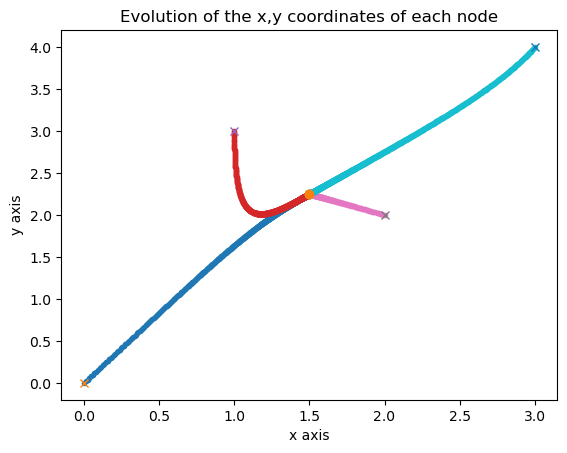

In [10]:
plt.title("Evolution of the x,y coordinates of each node")
plt.xlabel("x axis")
plt.ylabel("y axis")

(n, num_iter)=states_x_iter.shape
for i in range(n):
  v_x=states_x_iter[i,:]
  v_y=states_y_iter[i,:]
  plt.plot(v_x,v_y, marker='.',)
  # Special markers for the first and last values
  plt.plot(v_x[0],v_y[0],marker='x')
  plt.plot(v_x[-1],v_y[-1],marker='o')
  # alternative if we want to use arrows instead of lines.
  #x_ini=v_x[k]
  #y_ini=v_y[k]
  #dx= v_x[k+1] -x_ini
  #dy= v_y[k+1] -y_ini
  #plt.arrow(x_ini, y_ini, dx, dy, head_length=0.1,length_includes_head=True, head_width=0.05)
plt.show()





Plor the evolution of the states along the iterations. One plot for the x component, and other plot for the y component


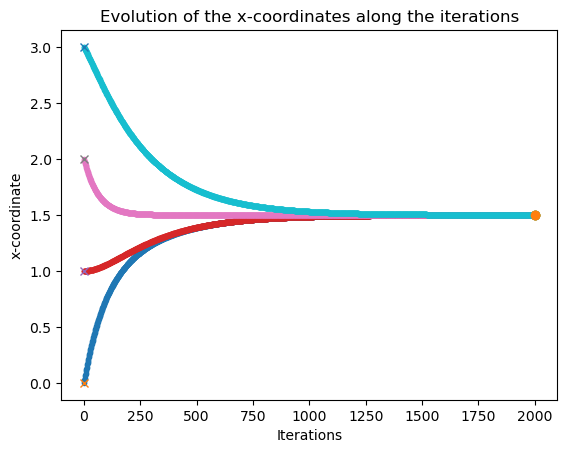

In [11]:
(n, num_iter)=states_x_iter.shape
plt.figure
plt.title("Evolution of the x-coordinates along the iterations")
plt.xlabel("Iterations")
plt.ylabel("x-coordinate")
v_x=np.arange(0,num_iter)
for i in range(n):
  v_y=states_x_iter[i,:]
  plt.plot(v_x,v_y, marker='.',)
  # Special markers for the first and last values
  plt.plot(v_x[0],v_y[0],marker='x')
  plt.plot(v_x[-1],v_y[-1],marker='o')
plt.show()

# Complete for displaying the evolution of the y-coordinate along the iterations